In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/wine_data.csv')

In [3]:
df.sample(3)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
133,3,12.51,1.24,2.25,17.5,85,2.0,0.58,0.60,1.25,5.45,0.75,1.51,650
102,2,11.82,1.72,1.88,19.5,86,2.5,1.64,0.37,1.42,2.06,0.94,2.44,415
89,2,12.08,1.83,2.32,18.5,81,1.6,1.50,0.52,1.64,2.40,1.08,2.27,480


In [5]:
df = pd.read_csv('/content/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [6]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

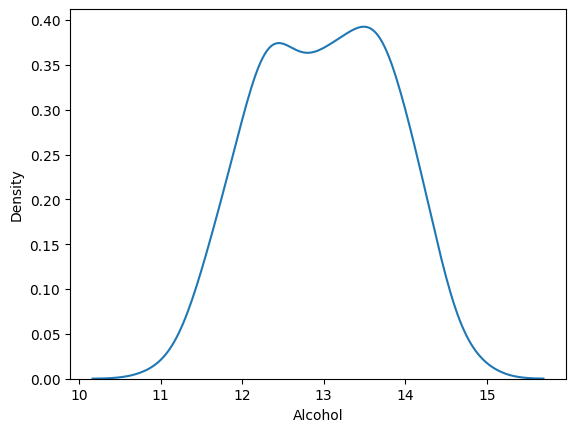

In [7]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

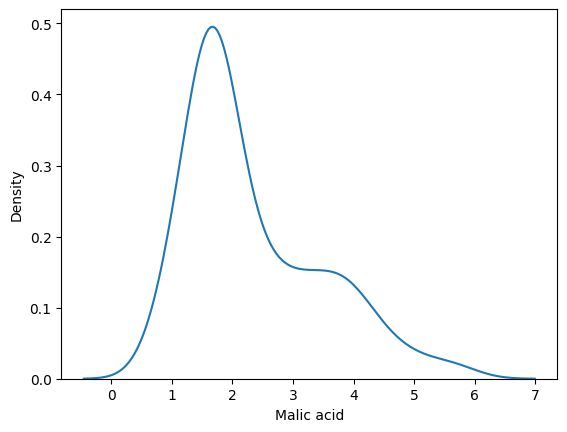

In [8]:
sns.kdeplot(df['Malic acid'])


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [11]:
X_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [12]:
y_train

22     1
108    2
175    3
145    3
71     2
      ..
103    2
67     2
117    2
47     1
172    3
Name: Class label, Length: 124, dtype: int64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
np.round(X_train.describe())


,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.0
std,1.0,1.0
min,11.0,1.0
25%,12.0,2.0
50%,13.0,2.0
75%,14.0,3.0
max,15.0,6.0


In [16]:
np.round(X_train_scaled.describe())


,Alcohol,Malic acid
count,124.0,124.0
mean,1.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,1.0,0.0
75%,1.0,0.0
max,1.0,1.0


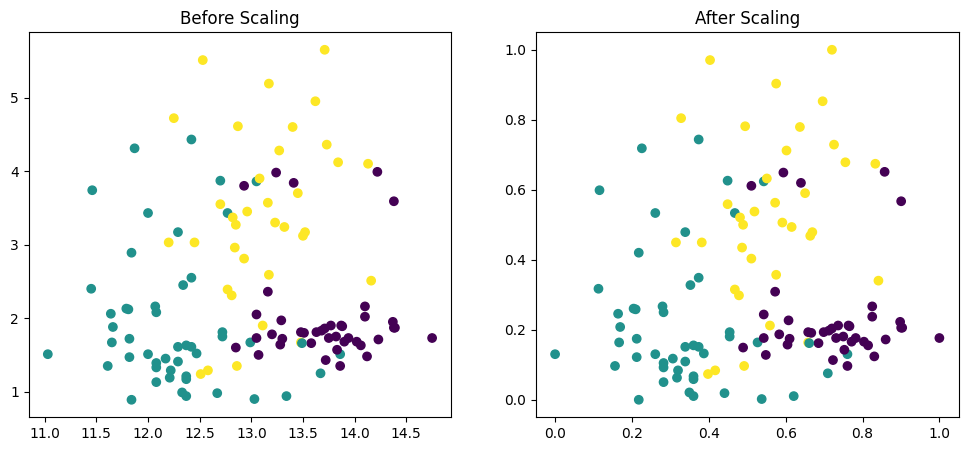

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()